# Análisis Exploratorio de Datos (EDA)
## Covid-19 en Estados Unidos

### Descripción del proyecto
Este proyecto realiza un análisis exploratorio de datos sobre la evolución
del Covid-19 en Estados Unidos. El objetivo es limpiar, explorar y analizar
los datos para obtener conclusiones claras y comprensibles que permitan
interpretar el comportamiento de la pandemia a lo largo del tiempo.

### Objetivos
- Comprender la estructura y calidad del dataset
- Realizar la limpieza y el preprocesado de los datos
- Analizar la evolución temporal de los casos y fallecimientos
- Generar visualizaciones que ayuden a comunicar los resultados obtenidos

## 1. Carga del dataset
Importamos pandas y cargamos el dataset

In [1]:
import pandas as pd

df = pd.read_csv("../data/all-states-history.csv")

## 2. Exploración inicial del dataset

Se visualizan las primeras filas del dataset para comprender su estructura y las variables disponibles.

In [2]:
df.head(10)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110
5,2021-03-07,CA,54124.0,NaN,258,NaN,NaN,NaN,4291.0,0,...,49646014.0,133186,NaN,NaN,NaN,NaN,NaN,0,49646014.0,133186
6,2021-03-07,CO,5989.0,5251.0,3,735.0,23904.0,23904.0,326.0,18,...,6415123.0,38163,435053.0,NaN,NaN,NaN,2616541.0,6107,NaN,0
7,2021-03-07,CT,7704.0,6327.0,0,1377.0,NaN,NaN,428.0,0,...,6520366.0,0,NaN,396680.0,NaN,NaN,NaN,0,6520366.0,0
8,2021-03-07,DC,1030.0,NaN,0,NaN,NaN,NaN,150.0,0,...,1261363.0,5726,NaN,NaN,NaN,NaN,441942.0,1149,NaN,0
9,2021-03-07,DE,1473.0,1337.0,9,136.0,NaN,NaN,104.0,0,...,1431942.0,5867,NaN,NaN,NaN,NaN,633424.0,1132,NaN,0


Se analiza el tamaño del dataset cuantas filas tiene y cuantas columnas

In [3]:
df.shape

(20780, 41)

Esta inspección permite identificar tipos de datos y posibles valores nulos.

In [4]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  str    
 1   state                             20780 non-null  str    
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float64
 12  negative       

Resume las columnas númericas 

In [5]:
df.describe()


,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,19930.000000,9422.000000,20780.000000,7593.000000,12382.000000,12382.000000,17339.000000,20780.000000,3789.000000,11636.000000,...,2.061400e+04,20780.000000,4.789000e+03,3.421000e+03,2200.000000,999.000000,9.197000e+03,2.078000e+04,1.451600e+04,2.078000e+04
mean,3682.216859,3770.182764,24.790712,417.291321,9262.762478,9262.762478,1190.576965,37.360780,1934.191607,359.621176,...,2.186936e+06,17508.388210,1.634028e+05,3.089196e+05,165431.783182,168188.246246,9.650105e+05,2.739554e+03,2.304555e+06,1.296143e+04
std,6281.366321,4157.640633,60.162742,537.625982,12620.544081,12620.544081,2060.041207,208.237151,1953.329983,594.831150,...,4.436508e+06,33586.022461,2.016978e+05,4.232854e+05,178181.836898,143748.073365,1.415215e+06,1.621900e+04,4.445365e+06,3.749509e+04
min,0.000000,0.000000,-201.000000,0.000000,1.000000,1.000000,0.000000,-12257.000000,6.000000,0.000000,...,0.000000e+00,-130545.000000,0.000000e+00,1.000000e+00,1.000000,3.000000,0.000000e+00,-1.043744e+06,0.000000e+00,-1.154583e+06
25%,161.250000,607.000000,0.000000,79.000000,985.250000,985.250000,166.500000,0.000000,501.000000,60.000000,...,1.040498e+05,1205.750000,1.896500e+04,2.004700e+04,54912.750000,37675.500000,1.414700e+05,0.000000e+00,1.324600e+05,0.000000e+00
50%,1108.000000,2409.500000,6.000000,216.000000,4472.000000,4472.000000,531.000000,0.000000,1295.000000,172.000000,...,6.552670e+05,6125.000000,8.465200e+04,1.233840e+05,103967.500000,144130.000000,4.193720e+05,0.000000e+00,7.316510e+05,1.896500e+03
75%,4387.500000,5462.000000,24.000000,460.000000,12248.500000,12248.500000,1279.000000,36.000000,2451.000000,380.000000,...,2.264766e+06,19086.500000,2.300110e+05,4.327270e+05,183103.000000,255251.000000,1.229298e+06,2.478000e+03,2.496925e+06,1.244100e+04
max,54124.000000,21177.000000,2559.000000,2594.000000,82237.000000,82237.000000,22851.000000,16373.000000,9263.000000,5225.000000,...,4.964601e+07,473076.000000,1.054711e+06,2.664340e+06,995580.000000,580372.000000,1.124825e+07,8.208170e+05,4.964601e+07,2.164543e+06


Esto ayuda a saber que variables hay y elegir cual vamos analizar

In [6]:
df.columns


Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

## 3. Preparación y transformación de datos

Miramos que tipo de dato es `date` aunque ya sabemos que es string tenemos que convertir a número.

In [7]:
df['date'].dtype

<StringDtype(storage='python', na_value=nan)>

La columna `date`, que inicialmente estaba almacenada como texto,
se convierte al tipo datetime para permitir un análisis temporal correcto.
Aqui decimos que interprete la columna date con fechas reales

In [8]:
df['date'] = pd.to_datetime(df['date'])

Se valida que la conversión de la columna `date` se ha realizado correctamente.


In [9]:
df['date'].dtype


dtype('<M8[us]')

Se ordenan los registros cronológicamente en función de la columna `date`
para garantizar la coherencia del análisis temporal.

In [10]:
df = df.sort_values('date')

Se verifican las primeras filas del dataset para confirmar que la
ordenación se ha realizado correctamente.

In [11]:
df.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
20779,2020-01-13,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20778,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20777,2020-01-15,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20776,2020-01-16,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20775,2020-01-17,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


Se verifican las últimas filas del dataset para confirmar que la
ordenación se ha realizado correctamente.

In [12]:
df.tail()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
32,2021-03-07,NE,2113.0,NaN,0,NaN,6237.0,6237.0,137.0,8,...,2421684.0,1,NaN,NaN,NaN,NaN,974759.0,978,2421684.0,1
31,2021-03-07,ND,1478.0,NaN,0,NaN,3880.0,3880.0,23.0,2,...,1425146.0,679,NaN,156698.0,NaN,NaN,406303.0,-75,1536487.0,881
30,2021-03-07,NC,11502.0,10169.0,0,1333.0,NaN,NaN,1179.0,0,...,9688838.0,0,NaN,805924.0,NaN,NaN,NaN,0,9688838.0,0
28,2021-03-07,MS,6808.0,4737.0,3,2071.0,9162.0,9162.0,419.0,0,...,1756955.0,260,81986.0,748339.0,NaN,NaN,NaN,0,1642348.0,0
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0


## 4. Selección de variables relevantes

Se revisan nuevamente los nombres de las columnas con el objetivo de
seleccionar las variables relevantes para el análisis.

In [13]:
df.columns


Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

## 5. Ingeniería de variables temporales

Se crean variables temporales (año y mes) a partir de la fecha con el objetivo
de facilitar el análisis temporal y la construcción de visualizaciones que
permitan identificar tendencias a lo largo del tiempo.


Creamos una nueva columna `year` usando el año que hay dentro de la columna `date`

In [14]:
df['year'] = df['date'].dt.year

Creamos una nueva columna `month` usando el mes que hay dentro de la columna `date`

In [15]:
df['month'] = df['date'].dt.month

Se seleccionan las variables principales relacionadas con la evolución
de los casos, fallecimientos y hospitalizaciones por Covid-19.

In [16]:
cols = [
    'date',
    'state',
    'positive',
    'positiveIncrease',
    'death',
    'deathIncrease',
    'hospitalizedCurrently',
    'year',
    'month'
]

df_analysis = df[cols]


## 6. Tratamiento de valores nulos

Se analiza la presencia de valores nulos en cada columna del dataset seleccionado 
con el objetivo de evaluar la calidad de los datos antes de su tratamiento.

In [17]:
df_analysis.isnull().sum()


date                        0
state                       0
positive                  188
positiveIncrease            0
death                     850
deathIncrease               0
hospitalizedCurrently    3441
year                        0
month                       0
dtype: int64

Se identifican valores nulos en las variables acumulativas (casos positivos, fallecimientos). Dado que estos datos son históricos, los nulos se interpretan como una ausencia de actualización en el reporte de ese día.

Por tanto, para mantener la coherencia de la serie temporal, se procede a imputar los valores faltantes propagando el último dato conocido (método forward fill), asumiendo que la cifra acumulada se mantiene si no hay nuevo reporte. Los valores nulos restantes (al inicio de la serie) se rellenan con cero

In [18]:
df_analysis[['positive', 'death', 'hospitalizedCurrently']] = df_analysis[['positive', 'death', 'hospitalizedCurrently']].ffill()
df_analysis[['positive', 'death', 'hospitalizedCurrently']] = df_analysis[['positive', 'death', 'hospitalizedCurrently']].fillna(0)

Verificamos que todas las columnas ya no tengan valores nulos

In [19]:
df_analysis.isnull().sum()

date                     0
state                    0
positive                 0
positiveIncrease         0
death                    0
deathIncrease            0
hospitalizedCurrently    0
year                     0
month                    0
dtype: int64

## 7. Validación del dataset preparado para análisis

Se visualizan las columnas `date`, `year` y `month` para verificar que
las variables temporales se han generado correctamente.


In [20]:
df[['date', 'year', 'month']].head()


,date,year,month
20779,2020-01-13,2020,1
20778,2020-01-14,2020,1
20777,2020-01-15,2020,1
20776,2020-01-16,2020,1
20775,2020-01-17,2020,1


Se visualizan las primeras filas del dataset de análisis para comprobar
que la selección de variables y la limpieza de datos se han realizado correctamente.


In [21]:
df_analysis.head(10)


,date,state,positive,positiveIncrease,death,deathIncrease,hospitalizedCurrently,year,month
20779,2020-01-13,WA,0.0,0,0.0,0,0.0,2020,1
20778,2020-01-14,WA,0.0,0,0.0,0,0.0,2020,1
20777,2020-01-15,WA,0.0,0,0.0,0,0.0,2020,1
20776,2020-01-16,WA,0.0,0,0.0,0,0.0,2020,1
20775,2020-01-17,WA,0.0,0,0.0,0,0.0,2020,1
20774,2020-01-18,WA,0.0,0,0.0,0,0.0,2020,1
20773,2020-01-19,WA,1.0,1,0.0,0,0.0,2020,1
20772,2020-01-20,WA,1.0,0,0.0,0,0.0,2020,1
20771,2020-01-21,WA,2.0,1,0.0,0,0.0,2020,1
20770,2020-01-22,WA,2.0,0,0.0,0,0.0,2020,1


## 8. Análisis exploratorio y visualización de datos

En esta sección se exploran las relaciones y tendencias principales del
dataset mediante visualizaciones que permitan identificar patrones en la
evolución temporal de la pandemia.


### 8.1 Evolución temporal de los casos positivos

Se analiza la evolución temporal del número de casos positivos con el
objetivo de identificar tendencias, picos de contagio y periodos de mayor
incidencia de la pandemia.


In [22]:
cases_by_date = df_analysis.groupby('date')['positiveIncrease'].sum().reset_index()

Se agrupan los casos positivos por fecha con el objetivo de analizar la
evolución temporal del número total de contagios en Estados Unidos.

In [23]:
cases_by_date.head(10)

,date,positiveIncrease
0,2020-01-13,0
1,2020-01-14,0
2,2020-01-15,0
3,2020-01-16,0
4,2020-01-17,0
5,2020-01-18,0
6,2020-01-19,1
7,2020-01-20,0
8,2020-01-21,1
9,2020-01-22,0


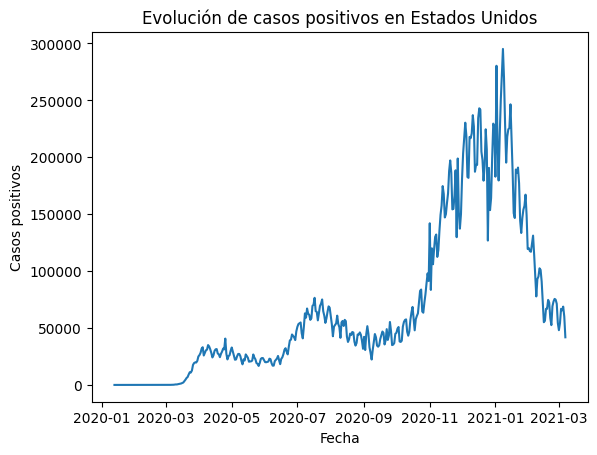

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure()
plt.plot(cases_by_date ["date"], cases_by_date ["positiveIncrease"])
plt.title('Evolución de casos positivos en Estados Unidos')
plt.xlabel("Fecha")
plt.ylabel("Casos positivos")
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

### 8.1.1 Análisis comparativo de casos por año

Para comprender la magnitud global de la pandemia en los distintos periodos, agrupamos los datos anualmente.

> **Nota técnica:** Es importante recordar que el dataset finaliza en **marzo de 2021**, por lo que los datos de ese año no representan el año completo, sino solo el primer trimestre. Además, utilizamos la variable `positiveIncrease` (casos nuevos) en lugar de la acumulada para obtener la suma real de contagios en cada periodo.

In [26]:
cases_by_year = df_analysis.groupby('year')['positiveIncrease'].sum().reset_index()

In [30]:
cases_by_year

,year,positiveIncrease
0,2020,19864278
1,2021,8892115


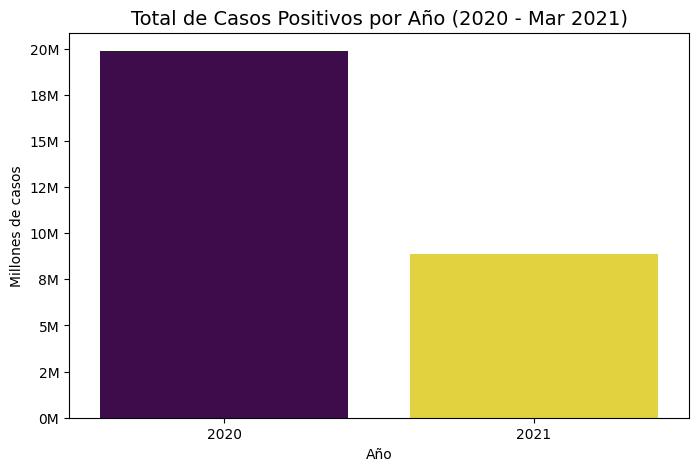

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


# 2. Configurar el gráfico
plt.figure(figsize=(8, 5))

#  Añadimos hue='year' y legend=False 
ax = sns.barplot(
    data=cases_by_year, 
    x='year', 
    y='positiveIncrease', 
    palette='viridis', 
    hue='year', 
    legend=False
)

# 3. Etiquetas y Títulos
plt.title('Total de Casos Positivos por Año (2020 - Mar 2021)', fontsize=14)
plt.ylabel('Millones de casos')
plt.xlabel('Año')

#  Usamos FuncFormatter para el eje Y (forma limpia sin warnings)
def millones_fmt(x, pos):
    return '{:,.0f}M'.format(x / 1_000_000)

ax.yaxis.set_major_formatter(FuncFormatter(millones_fmt))

plt.show()

### 8.1.2 Evolución mensual: La curva epidémica

El análisis anual nos ofrece una visión general, pero oculta la dinámica real de los contagios. Para identificar patrones estacionales y las diferentes "olas" de la pandemia, es necesario aumentar la granularidad del análisis.

En esta sección, agrupamos los nuevos casos (`positiveIncrease`) por mes y año. Esto nos permitirá visualizar la velocidad de transmisión del virus a lo largo del tiempo.

In [33]:
cases_by_month = df_analysis.groupby(['year', 'month'])['positiveIncrease'].sum().reset_index()

In [37]:
cases_by_month.head(15)

,year,month,positiveIncrease
0,2020,1,2
1,2020,2,16
2,2020,3,196851
3,2020,4,876279
4,2020,5,718205
5,2020,6,831597
6,2020,7,1900180
7,2020,8,1457213
8,2020,9,1192663
9,2020,10,1892015


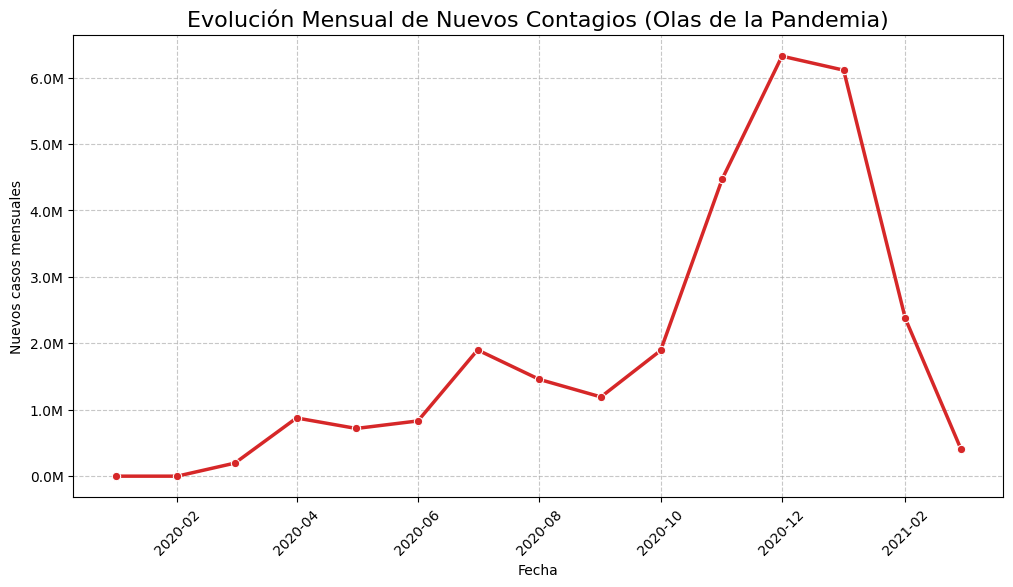

In [38]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter


#Crear una fecha "ficticia" para que la gráfica entienda el orden
# (Asignamos el día 1 a cada mes para poder crear un objeto datetime)
cases_by_month['periodo'] = pd.to_datetime(cases_by_month[['year', 'month']].assign(DAY=1))

#  Configuración del Gráfico
plt.figure(figsize=(12, 6))

# Usamos lineplot porque estamos viendo una evolución temporal continua
sns.lineplot(
    data=cases_by_month, 
    x='periodo', 
    y='positiveIncrease', 
    marker='o',       # Pone un puntito en cada dato
    color='tab:red',  # Un rojo profesional
    linewidth=2.5
)

#  "Maquillaje" del gráfico
plt.title('Evolución Mensual de Nuevos Contagios (Olas de la Pandemia)', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Nuevos casos mensuales')
plt.grid(True, linestyle='--', alpha=0.7) # Añade una rejilla suave de fondo

# 5. Formateo de Ejes (Para que se vea "Ene 2020", etc.)
# Eje X: Fechas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2)) # Muestra etiqueta cada 2 meses
plt.xticks(rotation=45) # Inclina el texto para que no se choque

# Eje Y: Millones (Reutilizamos la función que te enseñé antes)
def millones_fmt(x, pos):
    return '{:,.1f}M'.format(x / 1_000_000) # El .1f es para que muestre 1 decimal (ej: 1.5M)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millones_fmt))

plt.show()


### 8.2 Análisis Geográfico: Impacto por Estado

Estados Unidos es un país enorme y la pandemia no afectó a todos los estados por igual. Para visualizar la distribución geográfica del virus, utilizaremos un mapa de coropletas (mapa de calor geográfico).

Analizaremos el total de casos acumulados por estado para identificar las "zonas calientes" del país.

In [39]:
states_data = df_analysis.groupby('state')['positiveIncrease'].sum().reset_index()

In [41]:
states_data.head(10)

,state,positiveIncrease
0,AK,56886
1,AL,499819
2,AR,324818
3,AS,0
4,AZ,826452
5,CA,3501341
6,CO,436600
7,CT,285330
8,DC,41419
9,DE,88354


In [42]:
import plotly.express as px

# 2. Crear el Mapa Interactivo
fig = px.choropleth(
    states_data,
    locations='state',           # La columna con el código del estado (ej: CA, NY, TX)
    locationmode="USA-states",   # Decimos a Plotly que use el mapa de EEUU
    color='positiveIncrease',    # El color dependerá de la cantidad de casos
    scope="usa",                 # Centrar el mapa en USA
    color_continuous_scale="Reds", # Escala de colores (Rojo es intuitivo para peligro/virus)
    title='Mapa de Calor: Total de Casos por Estado'
)

fig.show()

### 8.3 Top 10 Estados con mayor incidencia

Complementando el mapa, generamos un ranking de los 10 estados con mayor número absoluto de contagios. Esto nos ayuda a identificar dónde se concentró la mayor carga sanitaria.

In [44]:
#  Ordenamos los datos de mayor a menor y cogemos los 10 primeros
top_10_states = states_data.sort_values('positiveIncrease', ascending=False).head(10)

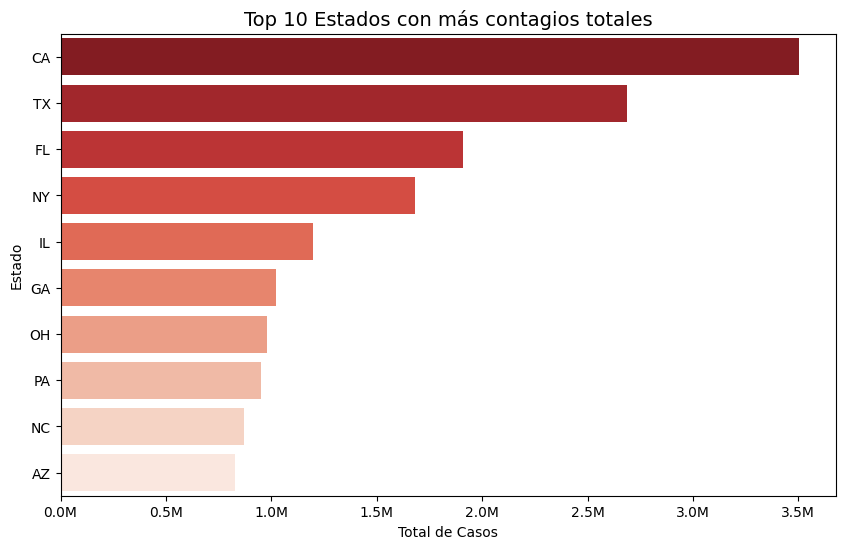

In [45]:
#  Visualización
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=top_10_states,
    x='positiveIncrease',
    y='state',
    palette='Reds_r', # 'Reds_r' invierte el color (el más oscuro arriba)
    hue='state',
    legend=False
)

plt.title('Top 10 Estados con más contagios totales', fontsize=14)
plt.xlabel('Total de Casos')
plt.ylabel('Estado')

# Usamos nuestro formateador de millones para que se lea bien
ax.xaxis.set_major_formatter(FuncFormatter(millones_fmt))

plt.show()

### 8.4 Relación entre Hospitalizaciones y Fallecimientos

¿Una mayor saturación hospitalaria implicó siempre una mayor mortalidad?
Mediante un gráfico de dispersión (Scatter Plot), analizamos la correlación entre las personas hospitalizadas actualmente y el incremento diario de muertes.

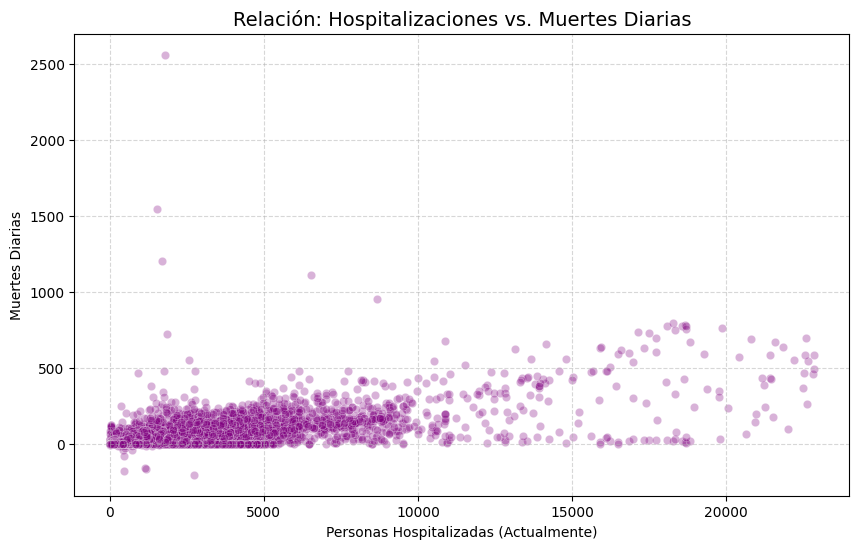

In [46]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_analysis,
    x='hospitalizedCurrently',  # Eje X: Cuánta gente hay en el hospital hoy
    y='deathIncrease',          # Eje Y: Cuánta gente murió hoy
    alpha=0.3,                  # Transparencia para ver dónde se agrupan los puntos
    color='purple'
)

plt.title('Relación: Hospitalizaciones vs. Muertes Diarias', fontsize=14)
plt.xlabel('Personas Hospitalizadas (Actualmente)')
plt.ylabel('Muertes Diarias')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### 8.4 Análisis de Mortalidad: Contagios vs. Fallecimientos

Analizar solo los contagios nos cuenta una parte incompleta de la historia. Para comprender la severidad real de la pandemia en sus distintas fases, es necesario comparar la evolución de los nuevos casos (`positiveIncrease`) con la de los nuevos fallecimientos (`deathIncrease`).

En esta sección, generamos una visualización comparativa utilizando **subplots** (dos gráficos alineados verticalmente). Esto nos permite:
1.  Observar si los picos de contagios se traducen inmediatamente en picos de mortalidad.
2.  Identificar el **desfase temporal (lag)**: habitualmente, el aumento de muertes ocurre semanas después del aumento de casos.
3.  Comparar tendencias: ¿Hubo momentos con pocos casos pero alta mortalidad? (Común al inicio de la pandemia).

In [47]:
# 1. Agrupamos las muertes por mes
deaths_by_month = df_analysis.groupby(['year', 'month'])['deathIncrease'].sum().reset_index()
deaths_by_month['periodo'] = pd.to_datetime(deaths_by_month[['year', 'month']].assign(DAY=1))

In [48]:
deaths_by_month.head(10)

,year,month,deathIncrease,periodo
0,2020,1,0,2020-01-01
1,2020,2,5,2020-02-01
2,2020,3,4326,2020-03-01
3,2020,4,55315,2020-04-01
4,2020,5,41137,2020-05-01
5,2020,6,19475,2020-06-01
6,2020,7,25249,2020-07-01
7,2020,8,30244,2020-08-01
8,2020,9,23329,2020-09-01
9,2020,10,23545,2020-10-01


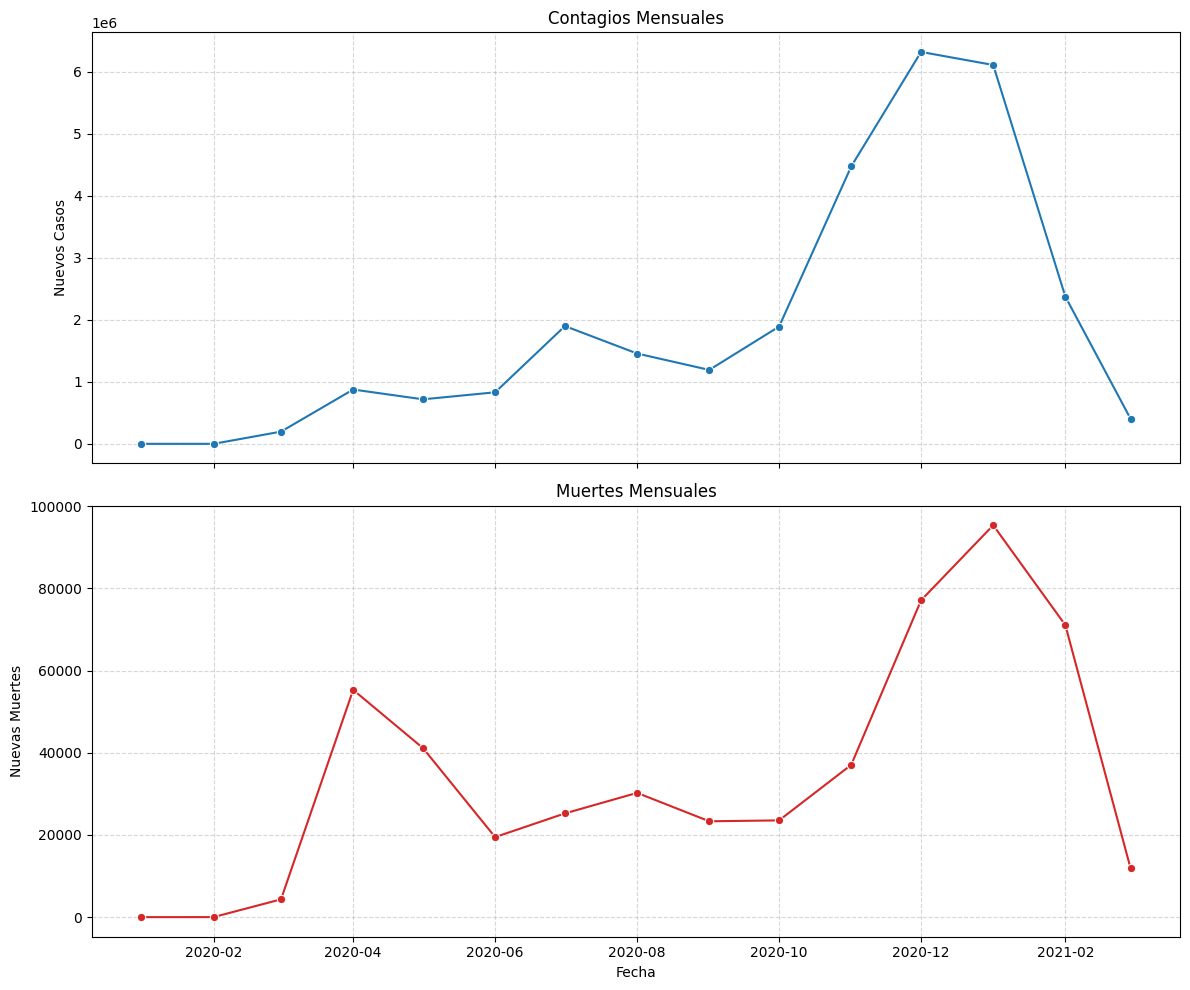

In [50]:
#  Gráfico comparativo (Subplots: Dos gráficas en una imagen)
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfica de arriba: CASOS (La que tengo arriba)
sns.lineplot(ax=axes[0], data=cases_by_month, x='periodo', y='positiveIncrease', color='tab:blue', marker='o')
axes[0].set_title('Contagios Mensuales', fontsize=12)
axes[0].set_ylabel('Nuevos Casos')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Gráfica de abajo: MUERTES (La nueva)
sns.lineplot(ax=axes[1], data=deaths_by_month, x='periodo', y='deathIncrease', color='tab:red', marker='o')
axes[1].set_title('Muertes Mensuales', fontsize=12)
axes[1].set_ylabel('Nuevas Muertes')
axes[1].set_xlabel('Fecha')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Formateo de fechas (solo en la de abajo para no repetir)
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.tight_layout()
plt.show()